In [1]:
from Structure.model import ThreeLayerNet
from train import train
from test import test
from parameter_search import parameter_search
from dataloaders import load_cifar10
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
from Structure.model import ThreeLayerNet

In [2]:

# current_dir = os.path.dirname(os.path.abspath(__file__))
# cifar10_dir = os.path.join(current_dir, 'cifar-10-batches-py')
cifar10_dir = './cifar-10-batches-py'

model_dir = './Model'

X_train, y_train, X_test, y_test = load_cifar10(cifar10_dir)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
num_training = 49000
num_validation = 1000
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]
input_size = X_train.shape[1]
output_size = 10
model = ThreeLayerNet(input_size, 512,256, output_size,L2=0,actfunlist=['relu','leakyrelu'])

In [ ]:
model.load(model_dir)

In [15]:
model,train_losses, val_losses, val_accuracies = train(model,X_train, y_train, X_val, y_val,learning_rate=1e-4,num_epochs=20)
model.save()

Iteration 0 / 15300: loss 2.587632
Iteration 500 / 15300: loss 1.817417
Iteration 1000 / 15300: loss 1.618097
Iteration 1500 / 15300: loss 1.597274
Iteration 2000 / 15300: loss 1.598838
Iteration 2500 / 15300: loss 1.557335
Iteration 3000 / 15300: loss 1.745746
Iteration 3500 / 15300: loss 1.420126
Iteration 4000 / 15300: loss 1.418848
Iteration 4500 / 15300: loss 1.511022
Iteration 5000 / 15300: loss 1.261332
Iteration 5500 / 15300: loss 1.253667
Iteration 6000 / 15300: loss 1.284801
Iteration 6500 / 15300: loss 1.310496
Iteration 7000 / 15300: loss 1.552491
Iteration 7500 / 15300: loss 1.474422
Iteration 8000 / 15300: loss 1.498947
Iteration 8500 / 15300: loss 1.237951
Iteration 9000 / 15300: loss 1.389763
Iteration 9500 / 15300: loss 1.220382
Iteration 10000 / 15300: loss 1.358279
Iteration 10500 / 15300: loss 1.278338
Iteration 11000 / 15300: loss 1.469145
Iteration 11500 / 15300: loss 1.405833
Iteration 12000 / 15300: loss 1.280704
Iteration 12500 / 15300: loss 1.106985
Iteration 

In [22]:
model.load(model_dir)
test_acc = test(model, X_test, y_test)
print("Test accuracy:", test_acc)

Test accuracy: 0.5294


In [16]:
def visualize_training(train_losses, val_losses, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 4))

    # 绘制训练集和验证集的 loss 曲线
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Training Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # 绘制验证集的 accuracy 曲线
    plt.subplot(1, 2, 2)
    plt.plot(epochs, val_accuracies, label='Validation Accuracy', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

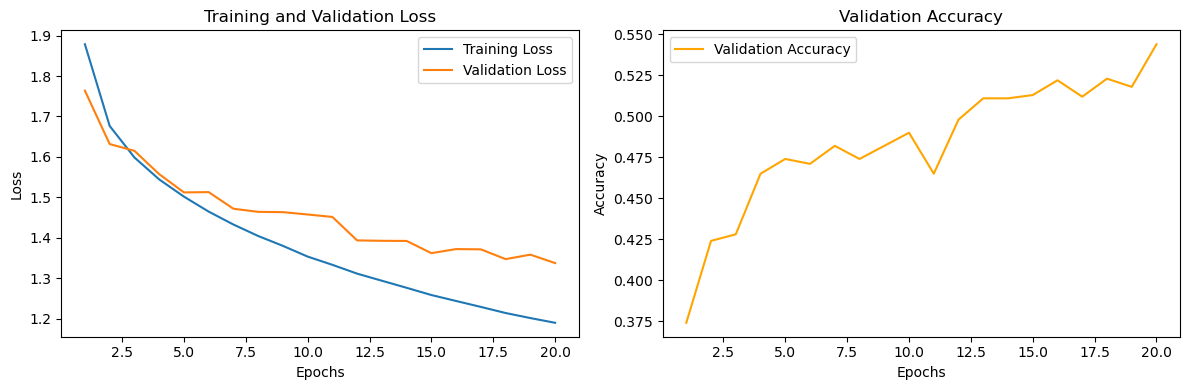

In [17]:
visualize_training(train_losses, val_losses, val_accuracies)

In [10]:
weight1=model.layers[0].weights
weight2=model.layers[1].weights
weight3=model.layers[2].weights

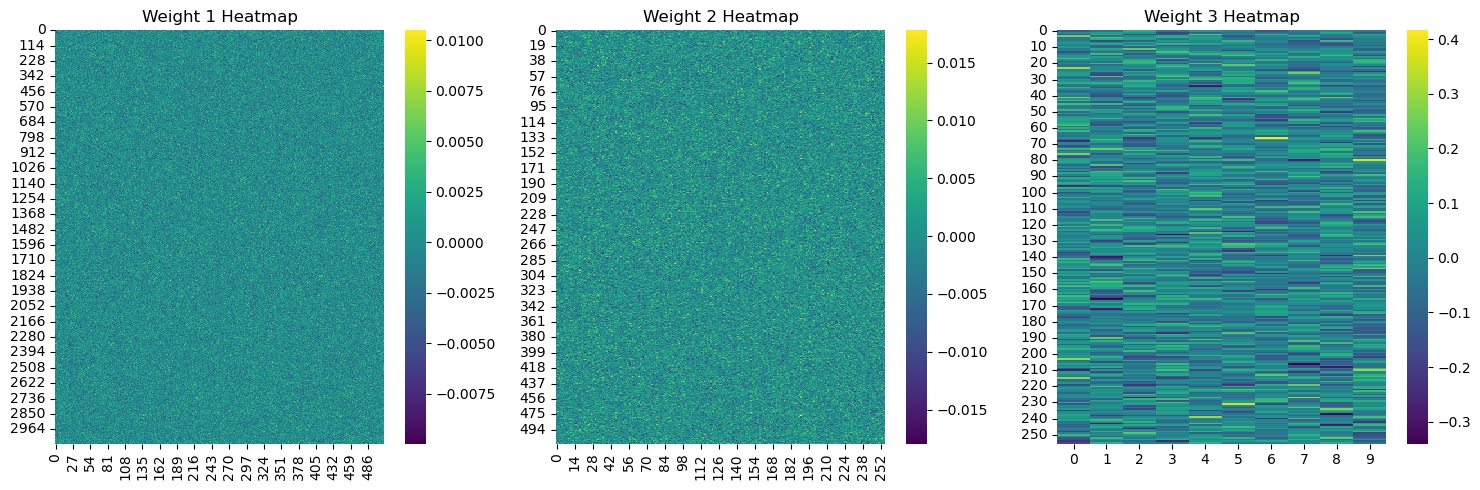

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.heatmap(weight1, ax=axes[0], cmap='viridis')
axes[0].set_title('Weight 1 Heatmap')
sns.heatmap(weight2, ax=axes[1], cmap='viridis')
axes[1].set_title('Weight 2 Heatmap')
sns.heatmap(weight3, ax=axes[2], cmap='viridis')
axes[2].set_title('Weight 3 Heatmap')
plt.tight_layout()
plt.show()

In [4]:
best_model = parameter_search(X_train, y_train, X_val, y_val, X_test, y_test,actfunlist=['relu','leakyrelu'],epoch=10)

Iteration 0 / 7650: loss 7.245628
Iteration 500 / 7650: loss 1.952583
Iteration 1000 / 7650: loss 1.951113
Iteration 1500 / 7650: loss 1.980616
Iteration 2000 / 7650: loss 1.896186
Iteration 2500 / 7650: loss 1.614746
Iteration 3000 / 7650: loss 1.837073
Iteration 3500 / 7650: loss 1.784126
Iteration 4000 / 7650: loss 1.585401
Iteration 4500 / 7650: loss 1.886628
Iteration 5000 / 7650: loss 1.792171
Iteration 5500 / 7650: loss 1.610378
Iteration 6000 / 7650: loss 1.810912
Iteration 6500 / 7650: loss 1.766825
Iteration 7000 / 7650: loss 1.605749
Iteration 7500 / 7650: loss 1.621038
Best validation accuracy: 0.439000
lr 1.000000e-03, hidden sizes (100, 50), reg 0.000000e+00; val accuracy: 0.439000 test accuracy: 0.427800
Iteration 0 / 7650: loss 5.392623
Iteration 500 / 7650: loss 1.935178
Iteration 1000 / 7650: loss 1.781233
Iteration 1500 / 7650: loss 1.695803
Iteration 2000 / 7650: loss 1.950559
Iteration 2500 / 7650: loss 1.837609
Iteration 3000 / 7650: loss 1.631158
Iteration 3500 /